Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 69.2     |
|    ep_rew_mean     | 27.7     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 3298     |
|    time_elapsed    | 0        |
|    total_timesteps | 277      |
| train/             |          |
|    std             | 0.0498   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 73.2     |
|    ep_rew_mean     | 29.7     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 945      |
|    time_elapsed    | 0        |
|    total_timesteps | 586      |
| train/             |          |
|    actor_loss      | 3.79     |
|    critic_loss     | 7.64     |
|    ent_coef        | 1.01     |
|    ent_coef_loss   | -0.00186 |
|    learning_rate   |

/Users/armandpl/Dev/furuta/.venv/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.plot_act to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.plot_act` for environment variables or `env.get_wrapper_attr('plot_act')` that will search the reminding wrappers.
  logger.warn(


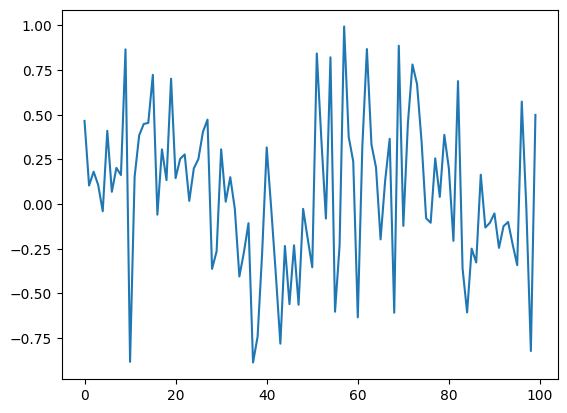

In [13]:
from sbx import SAC as SAC_SBX
from stable_baselines3 import SAC as SAC_SB3
import matplotlib.pyplot as plt
import gymnasium as gym
from furuta.rl.envs.furuta_sim import FurutaSim
from gymnasium.wrappers import TimeLimit

class ActionLogger(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.actions = []
    def step(self, action):
        self.actions.append(action)
        return self.env.step(action)
    def plot_act(self):
        plt.plot(self.actions[-100:])
        plt.show()

env = TimeLimit(ActionLogger(FurutaSim(speed_limits=[400, 400])), max_episode_steps=100)

model = SAC_SB3("MlpPolicy", env, verbose=1, use_sde=True, use_sde_at_warmup=True, learning_starts=500)
model.learn(total_timesteps=1000, log_interval=4)

env.plot_act()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 85.5     |
|    ep_rew_mean     | 10.5     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 4852     |
|    time_elapsed    | 0        |
|    total_timesteps | 342      |
| train/             |          |
|    std             | 0.0498   |
---------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 87.6      |
|    ep_rew_mean     | 8.03      |
| time/              |           |
|    episodes        | 8         |
|    fps             | 4869      |
|    time_elapsed    | 0         |
|    total_timesteps | 701       |
| train/             |           |
|    actor_loss      | 0.541     |
|    critic_loss     | 3.09      |
|    ent_coef        | 1         |
|    ent_coef_loss   | -0.000324 |
|    lea

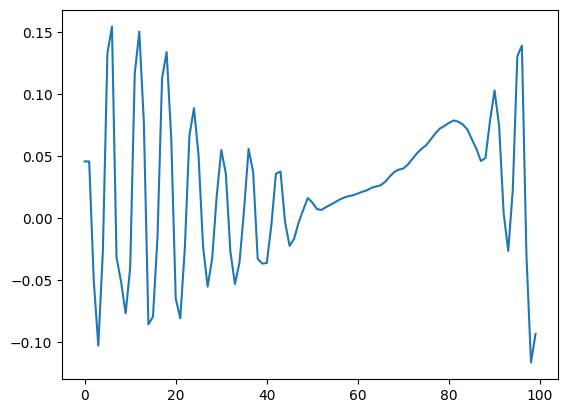

In [19]:
model = SAC_SB3("MlpPolicy", env, verbose=1, use_sde=True, use_sde_at_warmup=True, learning_starts=500, train_freq=(1, "episode"))
model.learn(total_timesteps=1000, log_interval=4)

env.plot_act()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | 22.7     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 340      |
|    time_elapsed    | 1        |
|    total_timesteps | 400      |
| train/             |          |
|    std             | 0        |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | 26.9     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 127      |
|    time_elapsed    | 6        |
|    total_timesteps | 800      |
| train/             |          |
|    actor_loss      | -1.77    |
|    critic_loss     | 0.192    |
|    ent_coef        | 0.917    |
|    n_updates       | 299      |
|    std             |

/Users/armandpl/Dev/furuta/.venv/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.plot_act to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.plot_act` for environment variables or `env.get_wrapper_attr('plot_act')` that will search the reminding wrappers.
  logger.warn(


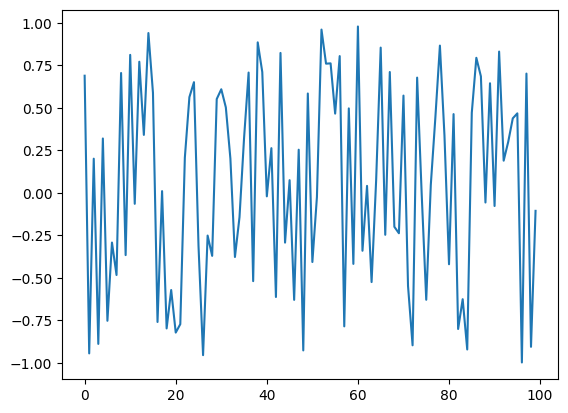

In [14]:
model = SAC_SBX("MlpPolicy", env, verbose=1, use_sde=True, use_sde_at_warmup=True, learning_starts=500)
model.learn(total_timesteps=1000, log_interval=4)

env.plot_act()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 81.8     |
|    ep_rew_mean     | 18       |
| time/              |          |
|    episodes        | 4        |
|    fps             | 544      |
|    time_elapsed    | 0        |
|    total_timesteps | 327      |
| train/             |          |
|    std             | 0        |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 72.8     |
|    ep_rew_mean     | 17       |
| time/              |          |
|    episodes        | 8        |
|    fps             | 223      |
|    time_elapsed    | 2        |
|    total_timesteps | 582      |
| train/             |          |
|    actor_loss      | 2.76     |
|    critic_loss     | 1.85     |
|    ent_coef        | 1        |
|    n_updates       | 2        |
|    std             |

/Users/armandpl/Dev/furuta/.venv/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.plot_act to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.plot_act` for environment variables or `env.get_wrapper_attr('plot_act')` that will search the reminding wrappers.
  logger.warn(


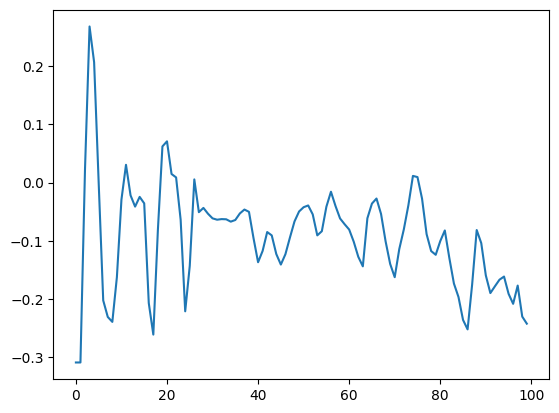

In [16]:
from sbx import TQC

model = TQC("MlpPolicy", env, verbose=1, use_sde=True, use_sde_at_warmup=True, learning_starts=500, train_freq=(1, "episode"))
model.learn(total_timesteps=1000, log_interval=4)

env.plot_act()